<a href="https://colab.research.google.com/github/Seb85vickz/CMP7005-Programming-for-Data-Analysis/blob/main/CMP7005_Assessment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🧭 Task 1 – Fundamental Data Understanding (Indian Air Pollution Data)**

### **🎯 Objective :**

The purpose of this task is to help you explore and understand the structure and quality of the Indian Air Pollution Dataset provided for your assessment.
You will use Pandas to:

* Combine multiple CSV files into a single dataset, and

* Perform fundamental data understanding (data inspection, summary statistics, and missing value analysis).

## **Mounting the drive**

In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
%cd '/content/drive/MyDrive/Colab/CMP7005'
# please change the path according to the location of your data

/content/drive/MyDrive/Colab/CMP7005


In [4]:
%ls # it shows all the content of your folder if done properly

Ahmedabad_data.csv       Chennai_data.csv     Kochi_data.csv
Aizawl_data.csv          Coimbatore_data.csv  Kolkata_data.csv
all_cities_combined.csv  Delhi_data.csv       Lucknow_data.csv
Amaravati_data.csv       Ernakulam_data.csv   Mumbai_data.csv
Amritsar_data.csv        Gurugram_data.csv    Patna_data.csv
Bengaluru_data.csv       Guwahati_data.csv    Shillong_data.csv
Bhopal_data.csv          Hyderabad_data.csv   Talcher_data.csv
Brajrajnagar_data.csv    Jaipur_data.csv      Thiruvananthapuram_data.csv
Chandigarh_data.csv      Jorapokhar_data.csv  Visakhapatnam_data.csv


# **🧩 What You Need to Do:**

**Step 1: Import Libraries :**

Start by importing the necessary Python libraries:

In [67]:
import pandas as pd
import os

### **🧩 Merging of the csv files:**



### **Combining all the csv files in the drive path: You can use either of the merging options:**  
---

**🧩 OPTION 1 :**

In [80]:
# Import the necessary libraries
import pandas as pd  # pandas is used for working with data tables
import glob         # glob is used to find files by name patterns

# STEP 1: The pattern "*_data.csv" means "find all files that end with '_data.csv'"
# This will find files like: Ahmedabad_data.csv, Delhi_data.csv, Mumbai_data.csv, etc.
city_files = glob.glob("*_data.csv")

# STEP 2: Create an empty list to store all our city data
# We'll put each city's data in this list before combining them
all_cities_data = []

# STEP 3: Read each city file one by one
for file_name in city_files:
    # Read the current city's CSV file into a DataFrame
    # A DataFrame is like a spreadsheet table in Python
    city_df = pd.read_csv(file_name)

    # Add this city's data to our list
    all_cities_data.append(city_df)

    # Optional: Print which file we just read
    print(f"Loaded: {file_name}")

# STEP 4: Combine all city data into one big table
# pd.concat() joins all the DataFrames in our list together
# ignore_index=True makes sure the row numbers are continuous (0, 1, 2, 3...)
combined_data = pd.concat(all_cities_data, ignore_index=True)

# STEP 5: Save the combined data to a new CSV file
# index=False means don't save the row numbers as a separate column
combined_data.to_csv("all_cities_combined.csv", index=False)

# STEP 6: Show us what we accomplished
# len(city_files) = count of how many city files we combined
# len(combined_data) = total number of rows in the final combined file
print(f"SUCCESS: Combined {len(city_files)} city files into one file with {len(combined_data)} total rows")
print("The combined file is saved as: all_cities_combined.csv")

Loaded: Aizawl_data.csv
Loaded: Gurugram_data.csv
Loaded: Brajrajnagar_data.csv
Loaded: Amritsar_data.csv
Loaded: Kochi_data.csv
Loaded: Patna_data.csv
Loaded: Delhi_data.csv
Loaded: Jorapokhar_data.csv
Loaded: Mumbai_data.csv
Loaded: Lucknow_data.csv
Loaded: Guwahati_data.csv
Loaded: Ernakulam_data.csv
Loaded: Shillong_data.csv
Loaded: Hyderabad_data.csv
Loaded: Coimbatore_data.csv
Loaded: Ahmedabad_data.csv
Loaded: Bhopal_data.csv
Loaded: Amaravati_data.csv
Loaded: Jaipur_data.csv
Loaded: Chennai_data.csv
Loaded: Kolkata_data.csv
Loaded: Bengaluru_data.csv
Loaded: Chandigarh_data.csv
Loaded: Visakhapatnam_data.csv
Loaded: Thiruvananthapuram_data.csv
Loaded: Talcher_data.csv
SUCCESS: Combined 26 city files into one file with 29531 total rows
The combined file is saved as: all_cities_combined.csv


In [81]:
df= pd.read_csv('all_cities_combined.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Aizawl,11/03/2020,32.69,47.91,6.99,2.85,11.93,26.64,0.60,4.53,4.48,0.03,0.30,NaN,NaN,NaN
1,Aizawl,12/03/2020,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,NaN,52.0,Satisfactory
2,Aizawl,13/03/2020,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,NaN,60.0,Satisfactory
3,Aizawl,14/03/2020,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,NaN,62.0,Satisfactory
4,Aizawl,15/03/2020,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,NaN,70.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Talcher,27/06/2020,20.75,25.94,8.17,21.95,15.89,6.73,1.18,18.62,48.87,0.00,NaN,NaN,90.0,Satisfactory
29527,Talcher,28/06/2020,24.88,31.07,NaN,NaN,0.00,NaN,1.55,21.33,48.55,0.00,NaN,NaN,98.0,Satisfactory
29528,Talcher,29/06/2020,20.37,25.46,22.82,19.64,18.96,10.23,1.59,20.79,46.84,0.00,NaN,NaN,99.0,Satisfactory
29529,Talcher,30/06/2020,18.62,23.26,21.24,26.53,47.60,4.45,1.30,14.34,28.77,0.00,NaN,NaN,86.0,Satisfactory


**🧩 OPTION 2 :**


The process involves iterating through all files in a specified directory (drive_path) to identify those with a .csv extension. Each identified CSV file is then read into a Pandas DataFrame, which is subsequently appended to a list (dataframes). Once all the CSV files are processed, the individual DataFrames in the list are combined into a single consolidated DataFrame (all_data) using the pd.concat() function. This consolidation ensures that the combined data is reindexed, creating a unified dataset for further analysis.

In [ ]:
drive_path = '/content/drive/MyDrive/Semester1_25/Beijing air quality'

In [ ]:
dataframes = []
for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(drive_path, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)  # Add the DataFrame to the list

In [ ]:
df1 = pd.concat(dataframes, ignore_index=True)

## **🧩 Perform Fundamental Data Understanding :**

**Once you have the merged dataset, explore and understand its structure.**

In [82]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Aizawl,11/03/2020,32.69,47.91,6.99,2.85,11.93,26.64,0.60,4.53,4.48,0.03,0.30,NaN,NaN,NaN
1,Aizawl,12/03/2020,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,NaN,52.0,Satisfactory
2,Aizawl,13/03/2020,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,NaN,60.0,Satisfactory
3,Aizawl,14/03/2020,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,NaN,62.0,Satisfactory
4,Aizawl,15/03/2020,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,NaN,70.0,Satisfactory


In [83]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Talcher,27/06/2020,20.75,25.94,8.17,21.95,15.89,6.73,1.18,18.62,48.87,0.0,NaN,NaN,90.0,Satisfactory
29527,Talcher,28/06/2020,24.88,31.07,NaN,NaN,0.00,NaN,1.55,21.33,48.55,0.0,NaN,NaN,98.0,Satisfactory
29528,Talcher,29/06/2020,20.37,25.46,22.82,19.64,18.96,10.23,1.59,20.79,46.84,0.0,NaN,NaN,99.0,Satisfactory
29529,Talcher,30/06/2020,18.62,23.26,21.24,26.53,47.60,4.45,1.30,14.34,28.77,0.0,NaN,NaN,86.0,Satisfactory
29530,Talcher,01/07/2020,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.0,NaN,NaN,101.0,Moderate


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [85]:
df.dtypes

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [86]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [87]:
df.shape
print(f'No of Rows: {df.shape[0]}, No of Columns: {df.shape[1]}')

No of Rows: 29531, No of Columns: 16


### **Total number of stations in the dataset:**

In [88]:
city_files = df['City'].value_counts()
print(f'Total number of Cities in the dataset : {len(city_files)}')
city_files


Total number of Cities in the dataset : 26


,count
City,
Lucknow,2009
Mumbai,2009
Delhi,2009
Bengaluru,2009
Chennai,2009
Ahmedabad,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


### **Displaying the percentage of missing value**

In [89]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Blues'))

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [90]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [91]:
print(df.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775    

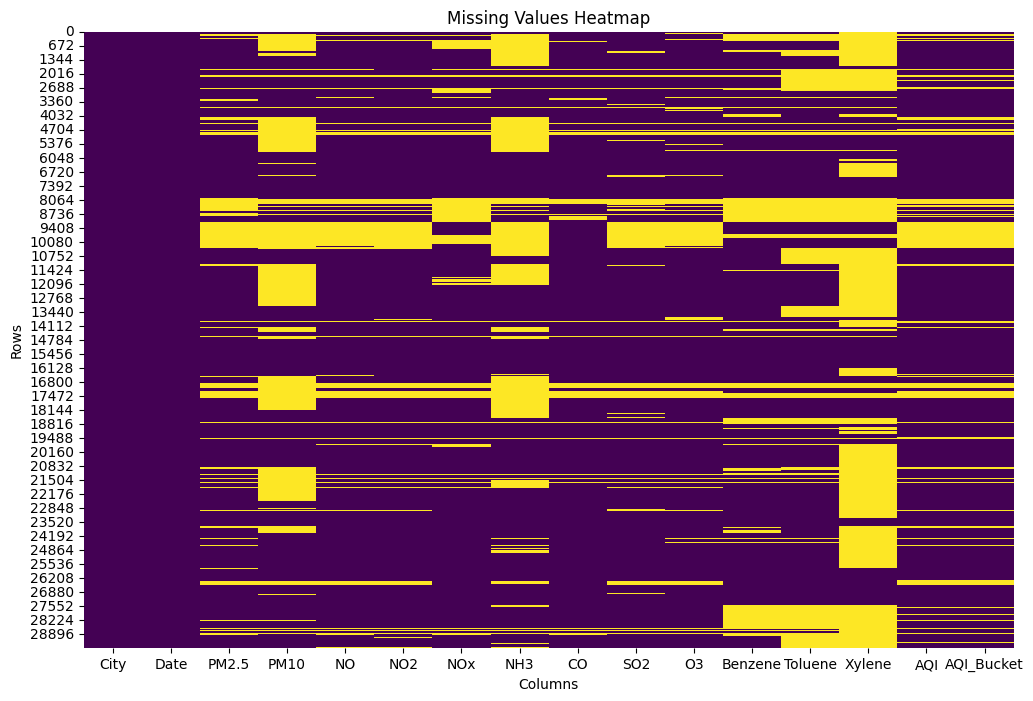

In [92]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [93]:
missing_values_per_city_files = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_per_city_files

/tmp/ipython-input-1556067515.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,,
Ahmedabad,0,0,628,1602,609,608,594,2009,609,640,685,483,483,484,675,675
Aizawl,0,0,2,1,0,0,0,0,0,0,9,15,15,113,2,2
Amaravati,0,0,59,55,55,55,55,55,97,65,55,75,75,269,110,110
Amritsar,0,0,128,63,93,44,289,42,76,168,115,195,212,213,95,95
Bengaluru,0,0,146,360,6,6,4,203,11,6,144,266,93,2009,99,99
Bhopal,0,0,9,9,9,9,9,9,9,9,9,289,289,289,11,11
Brajrajnagar,0,0,185,173,243,234,175,226,150,193,203,173,938,938,225,225
Chandigarh,0,0,15,0,4,4,4,10,0,0,0,0,0,0,5,5
Chennai,0,0,117,1707,36,36,36,462,25,36,49,285,253,2009,125,125


In [94]:
print("Total missing values per City:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per City:
City
Ahmedabad             10784
Aizawl                  159
Amaravati              1190
Amritsar               1828
Bengaluru              3452
Bhopal                  970
Brajrajnagar           4281
Chandigarh               47
Chennai                5301
Coimbatore              693
Delhi                  1087
Ernakulam               275
Gurugram               6843
Guwahati               1033
Hyderabad              1583
Jaipur                 1416
Jorapokhar             8603
Kochi                   356
Kolkata                 816
Lucknow                6082
Mumbai                14201
Patna                  6214
Shillong               1073
Talcher                4014
Thiruvananthapuram     3805
Visakhapatnam          2382
dtype: int64


/tmp/ipython-input-2279394426.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [95]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [96]:
df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']] = df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']].ffill()

In [97]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [98]:
df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']] = df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']].bfill()

In [99]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [100]:
missing_values_per_city_files = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_per_city_files

/tmp/ipython-input-1556067515.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,,
Ahmedabad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aizawl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amaravati,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amritsar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bengaluru,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bhopal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brajrajnagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chandigarh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chennai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
print("Total missing values per City:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per City:
City
Ahmedabad             0
Aizawl                0
Amaravati             0
Amritsar              0
Bengaluru             0
Bhopal                0
Brajrajnagar          0
Chandigarh            0
Chennai               0
Coimbatore            0
Delhi                 0
Ernakulam             0
Gurugram              0
Guwahati              0
Hyderabad             0
Jaipur                0
Jorapokhar            0
Kochi                 0
Kolkata               0
Lucknow               0
Mumbai                0
Patna                 0
Shillong              0
Talcher               0
Thiruvananthapuram    0
Visakhapatnam         0
dtype: int64


/tmp/ipython-input-2279394426.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**EDA**

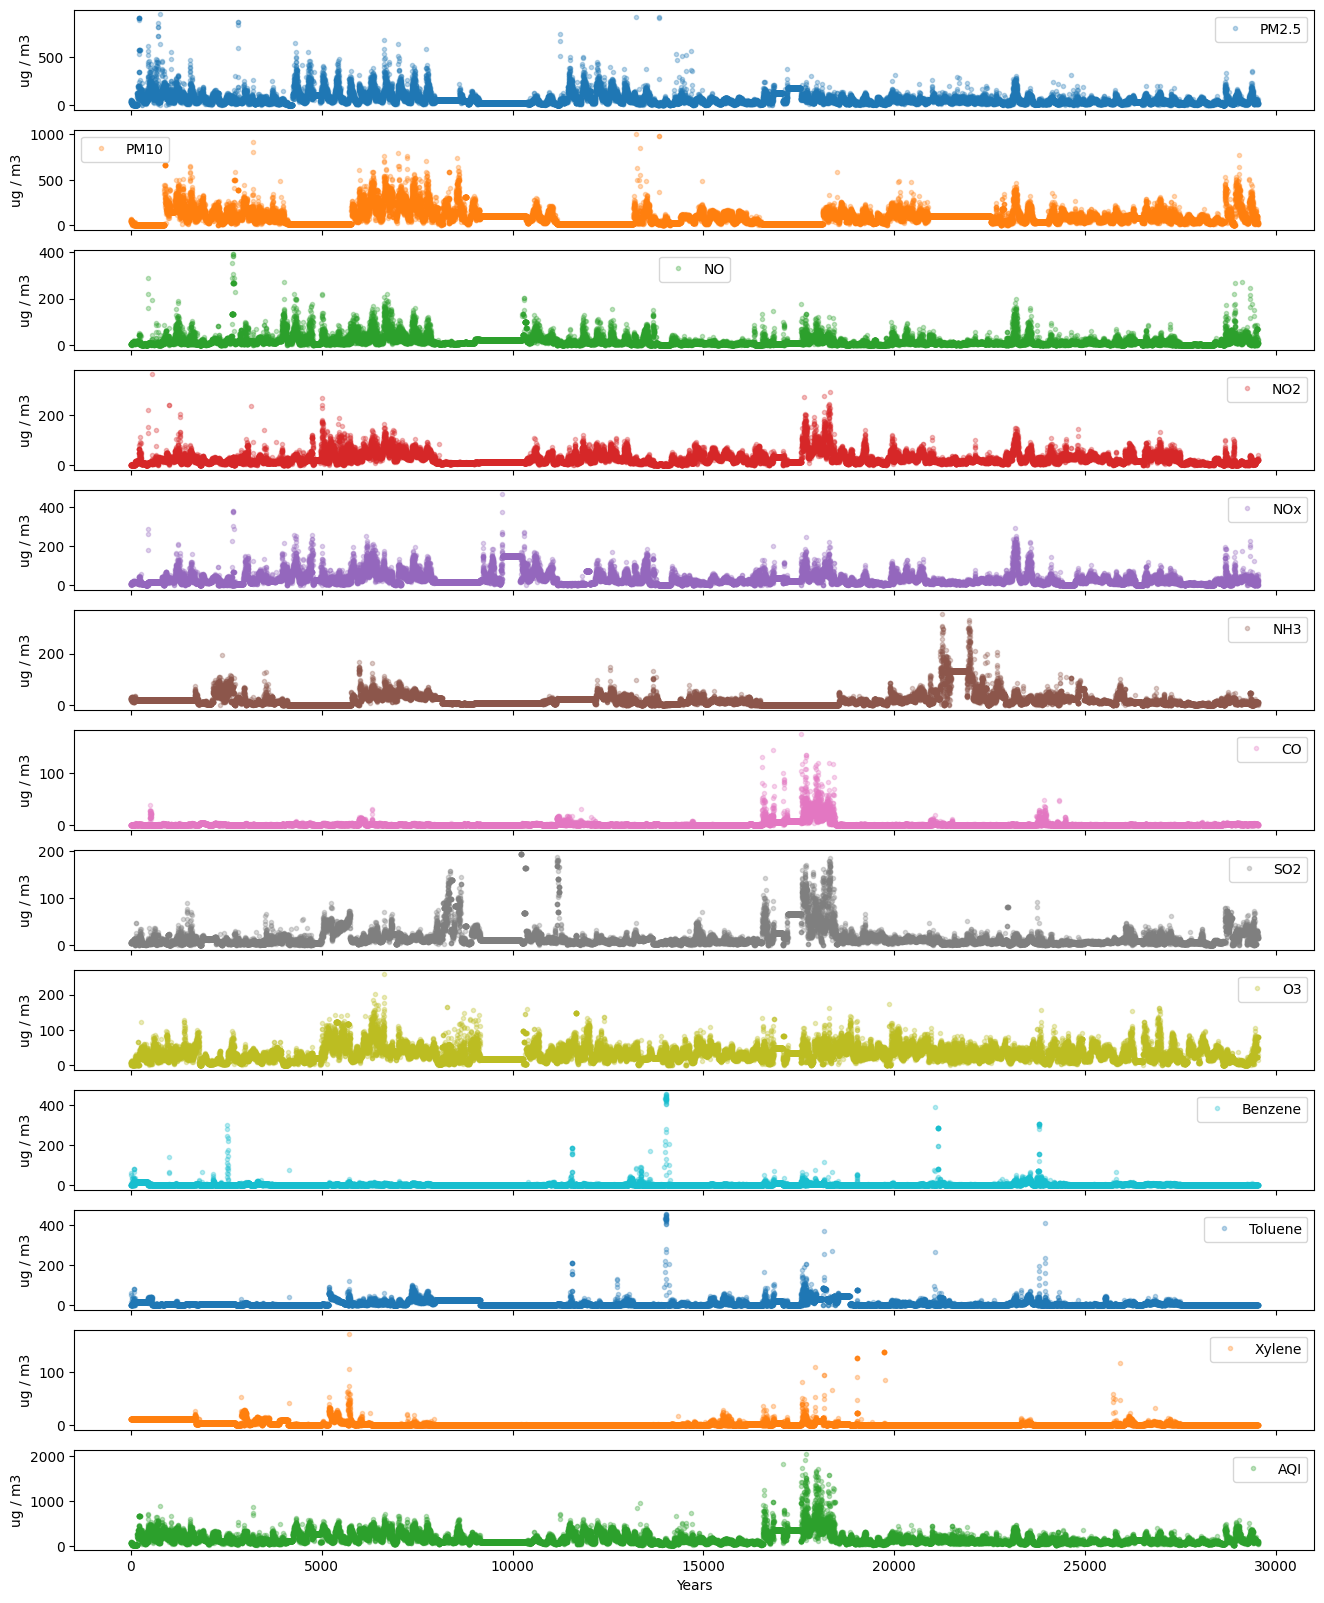

In [102]:
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']
axes = df[pollutants].plot(marker='.', alpha=0.3, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')        # plots shows variations of different parameters

In [103]:

city_stats = df.groupby('City')[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3']].mean().reset_index()

import plotly.express as px

# Melt the DataFrame to create a 'Pollutant' column
city_stats_melted = pd.melt(city_stats,
                               id_vars=['City'],
                               value_vars=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3'],
                               var_name='Pollutant',
                               value_name='Average Concentration')

# Create the stacked bar chart
fig_station = px.bar(city_stats_melted,
                     x='City',
                     y='Average Concentration',
                     color='Pollutant', # Use 'Pollutant' for color differentiation
                     title='Average Pollution Levels by Station (Stacked)',
                     labels={'city': 'City', 'Average Concentration': 'Average Concentration'},
                     barmode='stack')

fig_station.show()

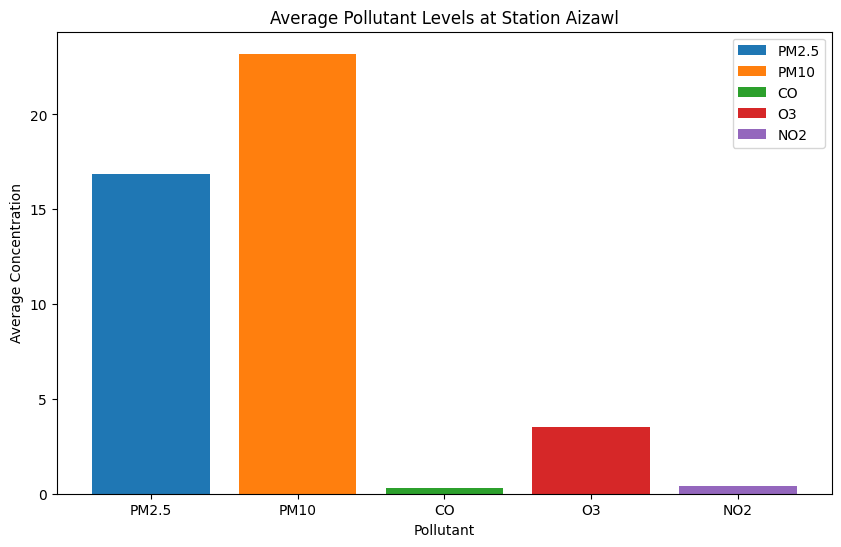

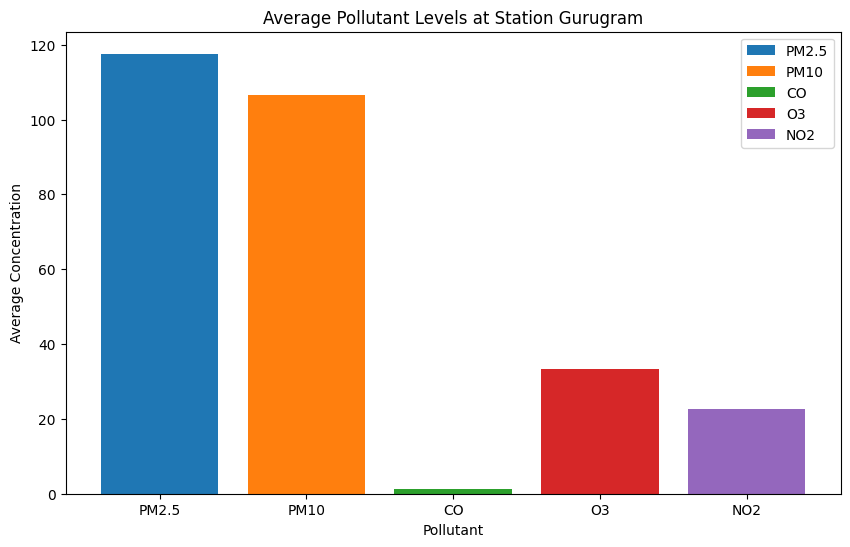

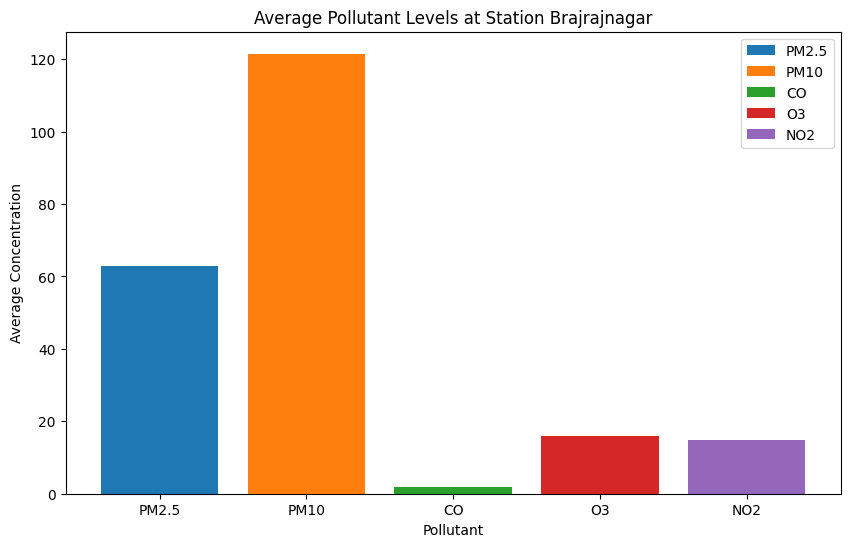

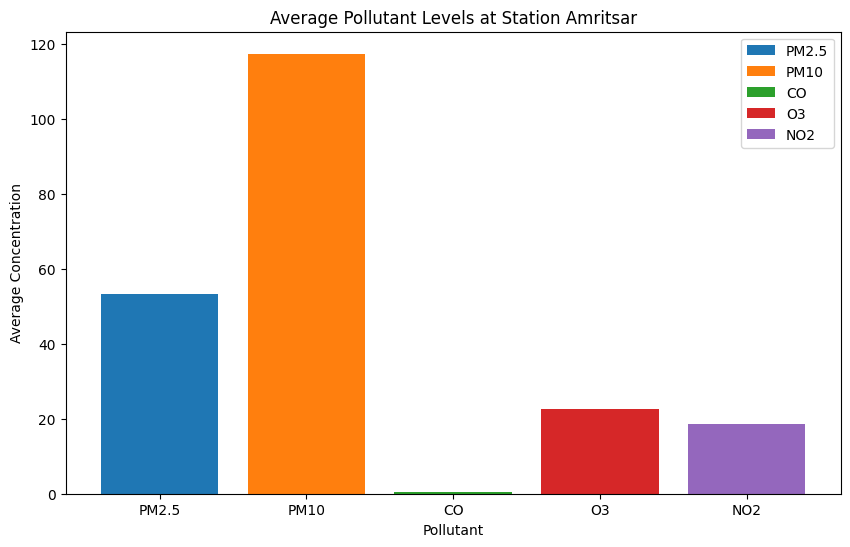

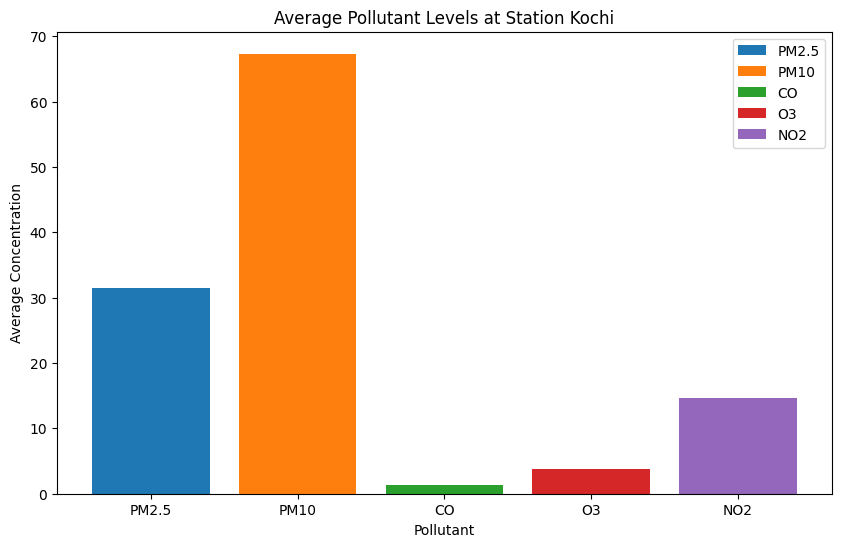

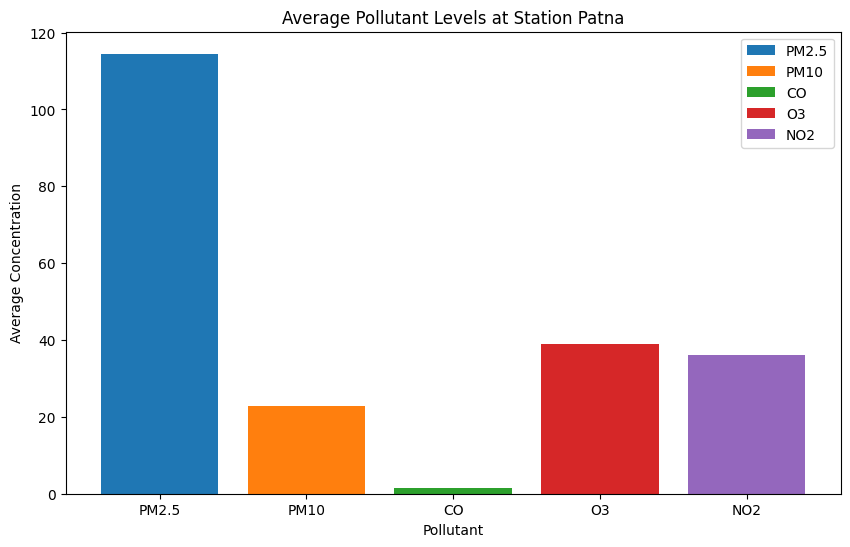

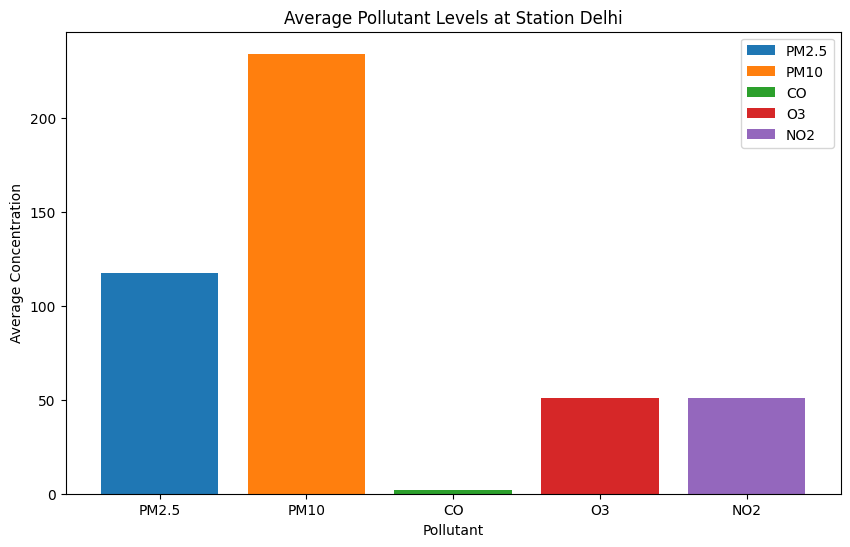

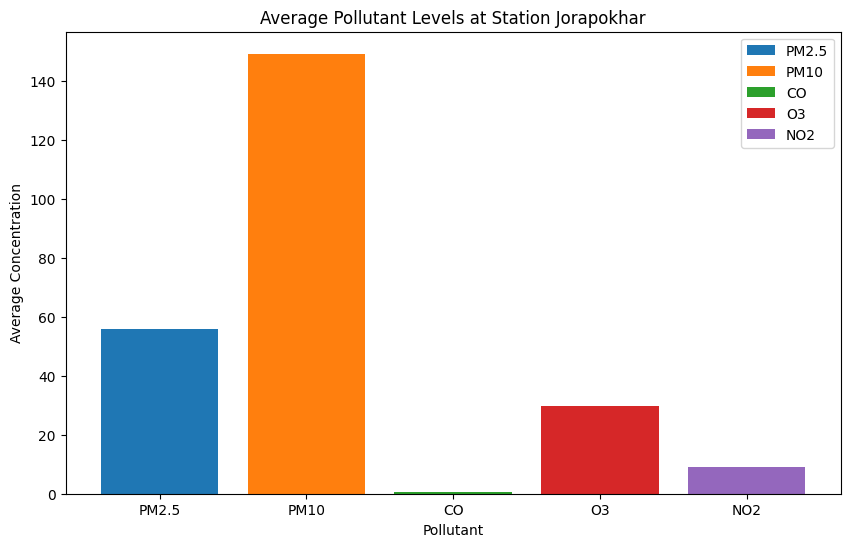

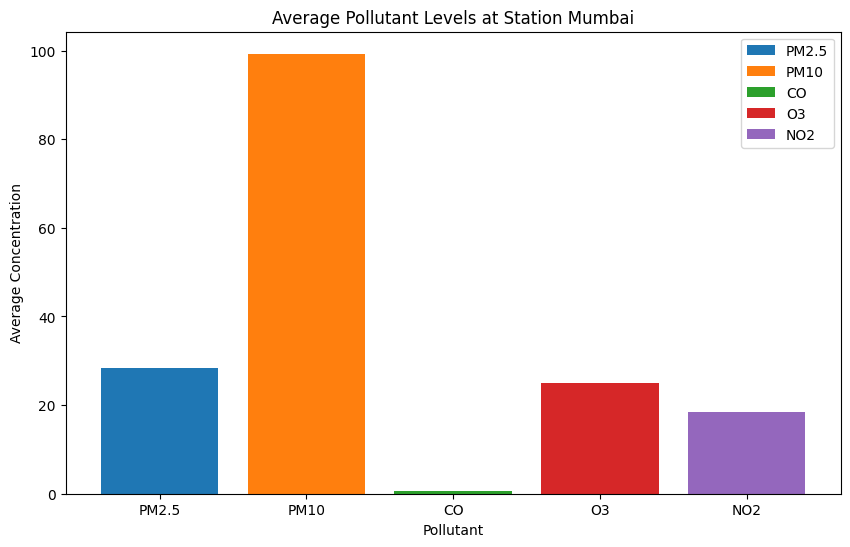

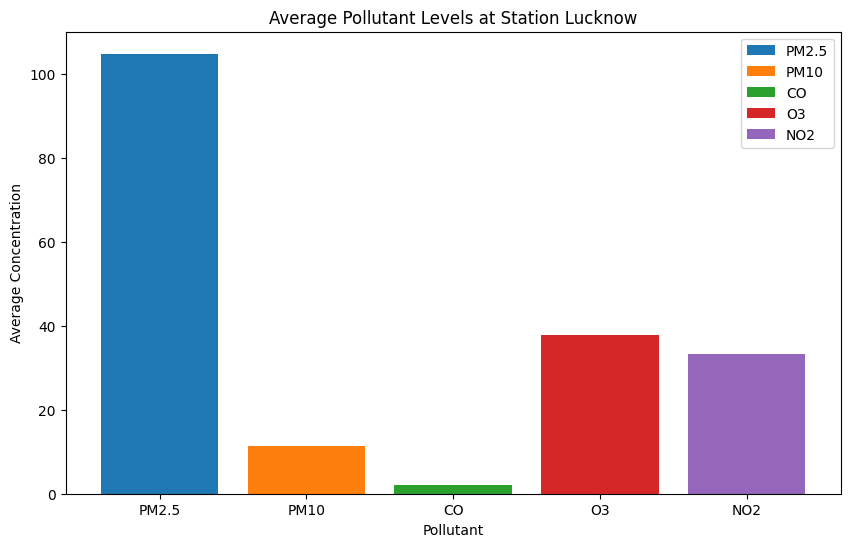

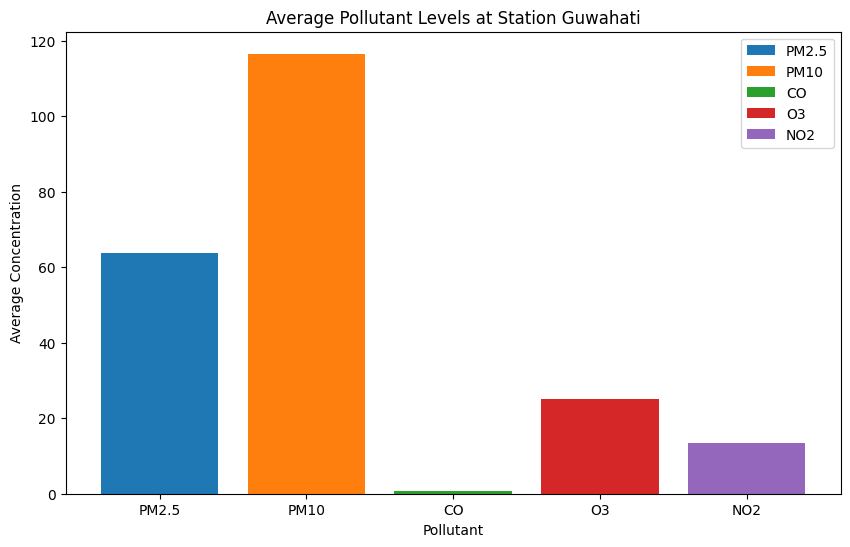

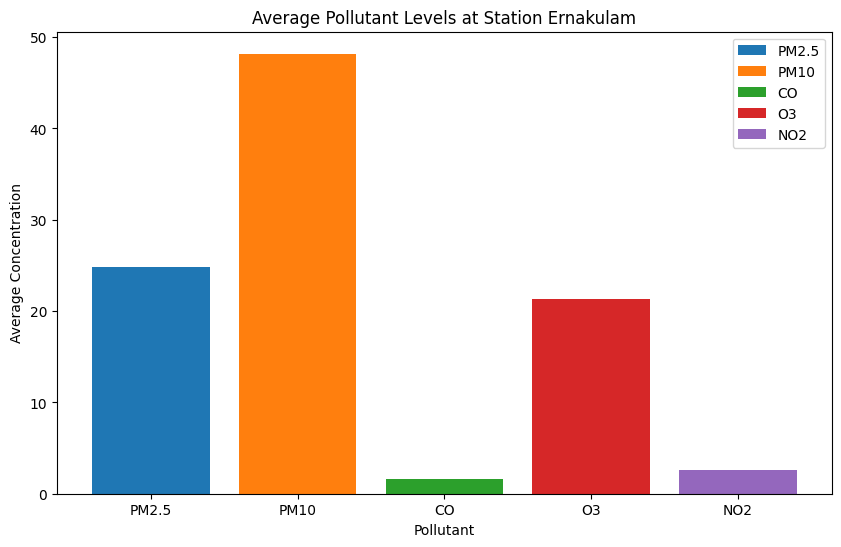

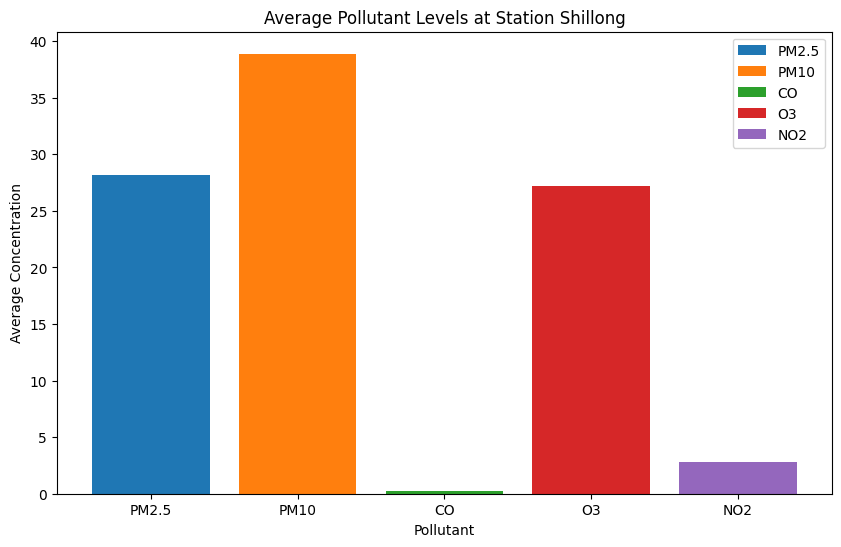

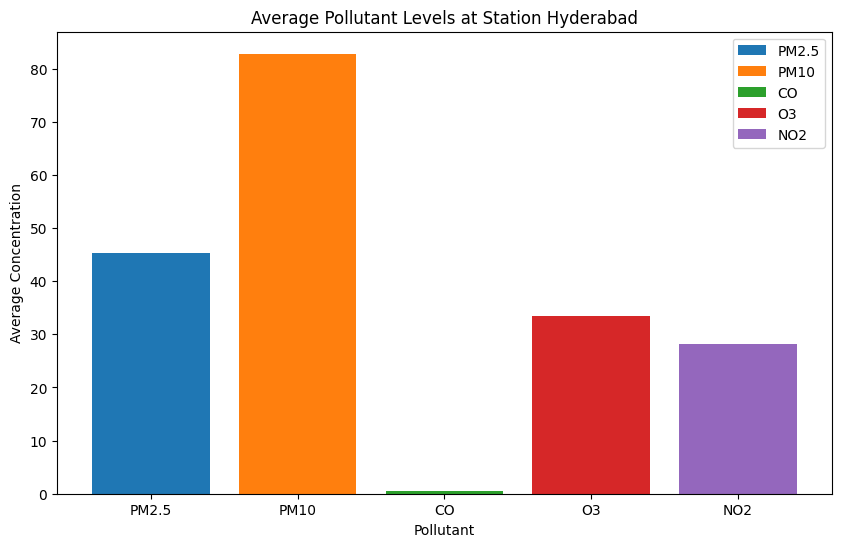

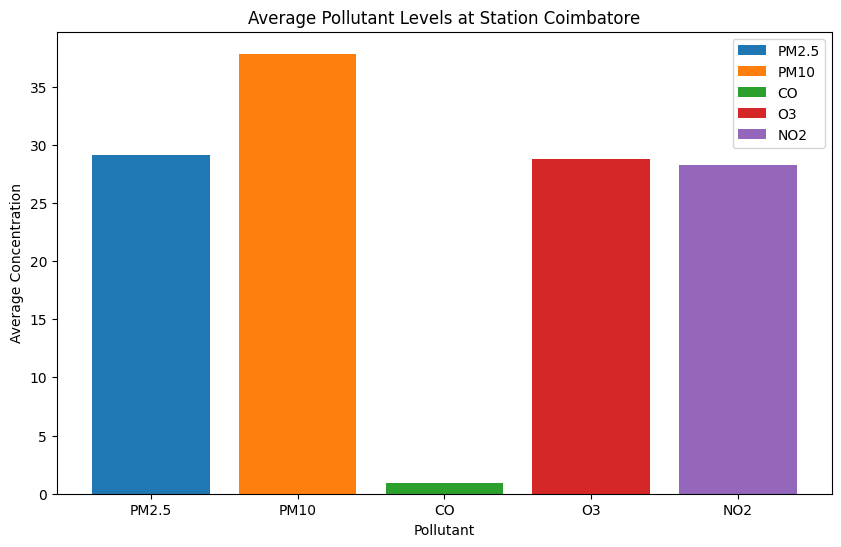

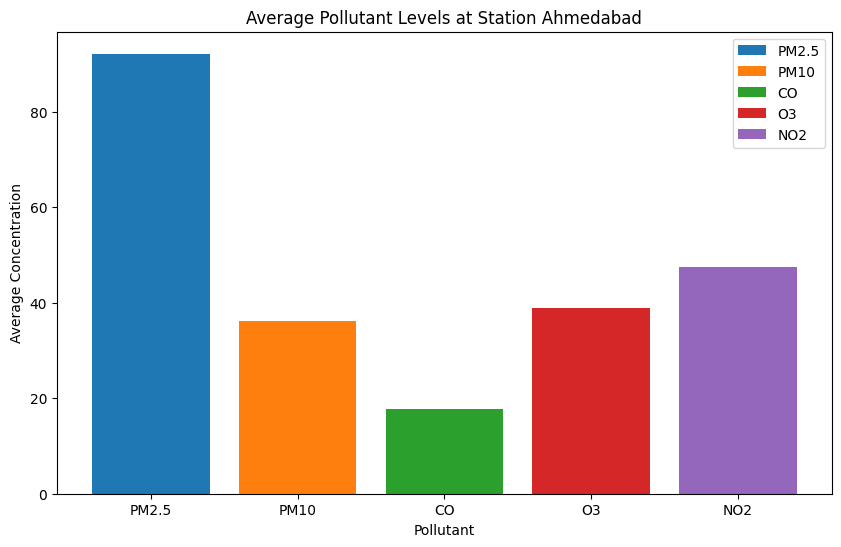

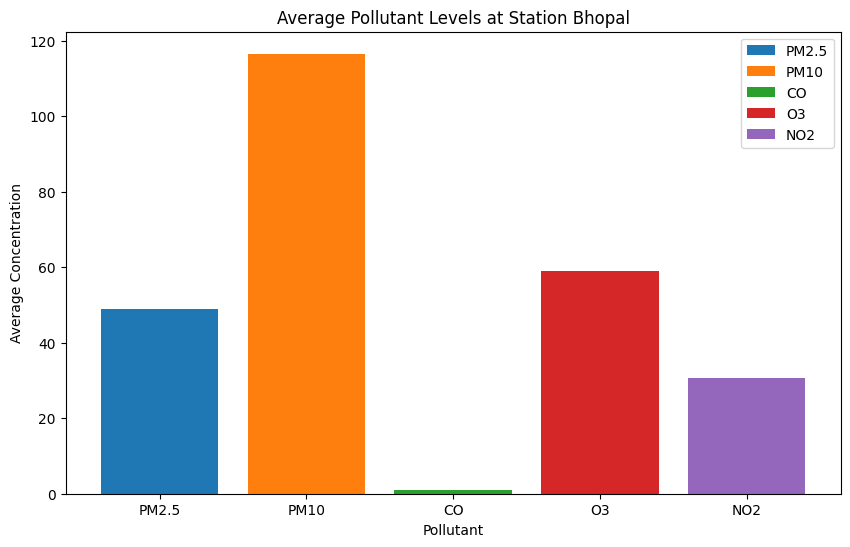

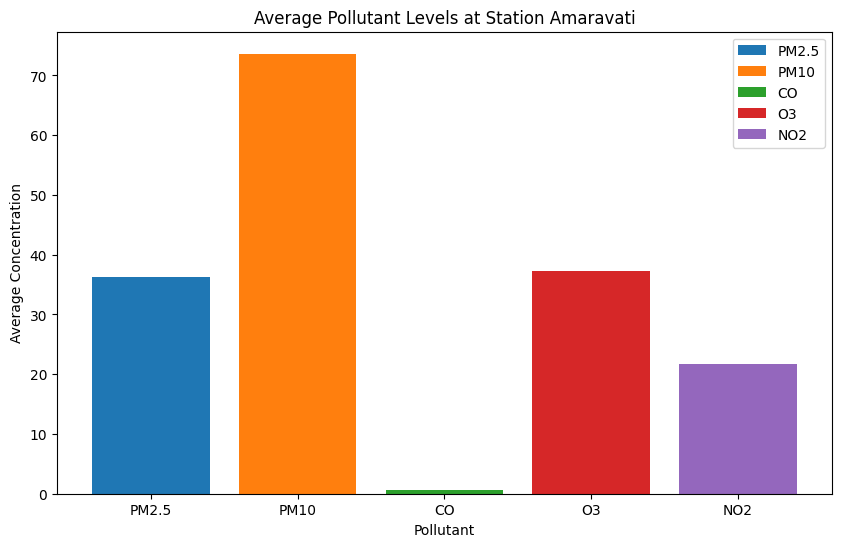

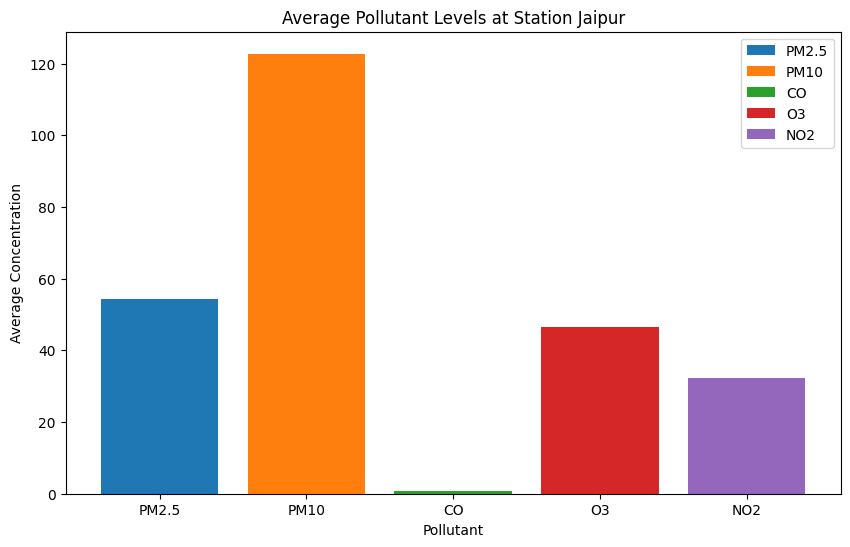

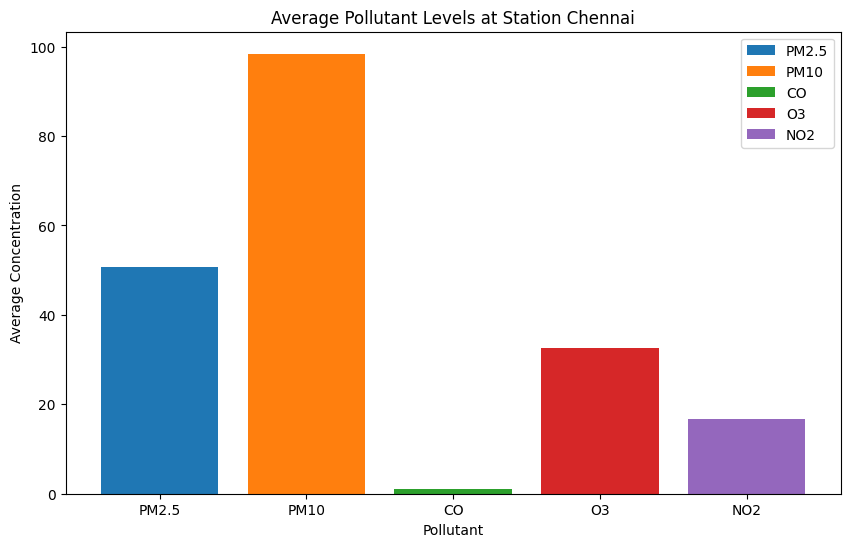

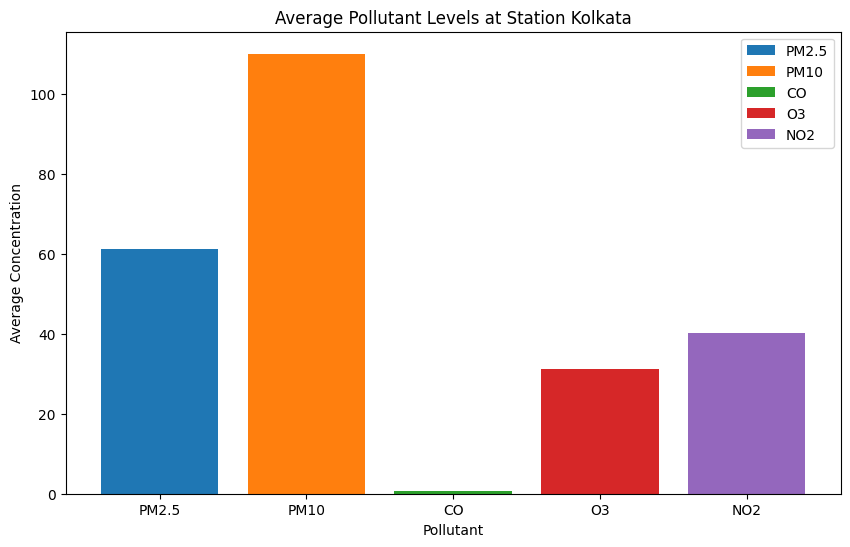

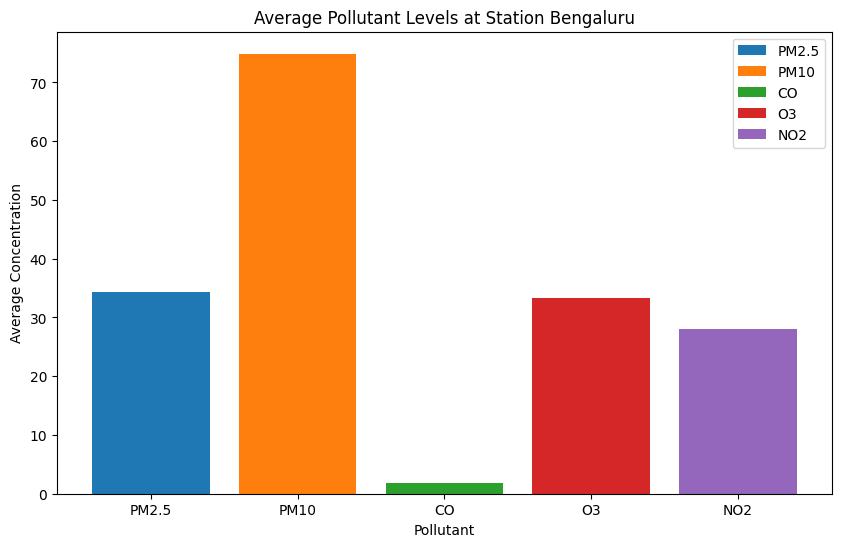

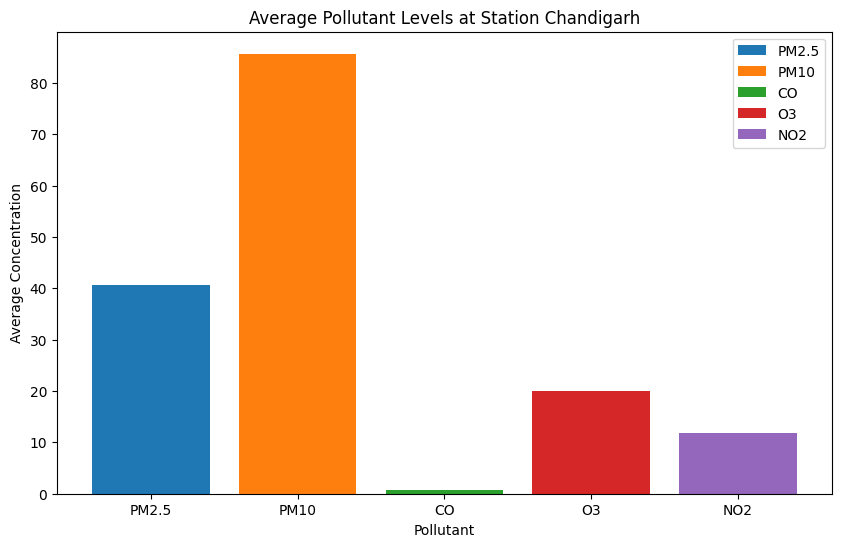

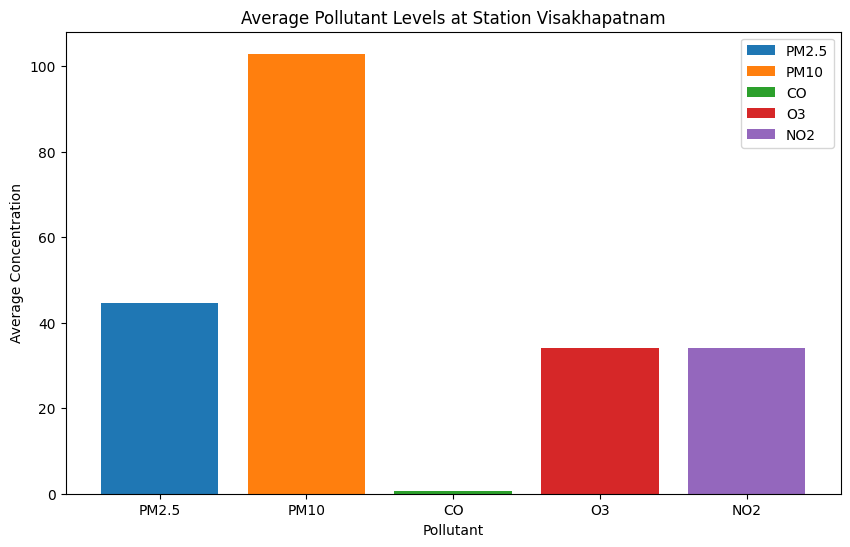

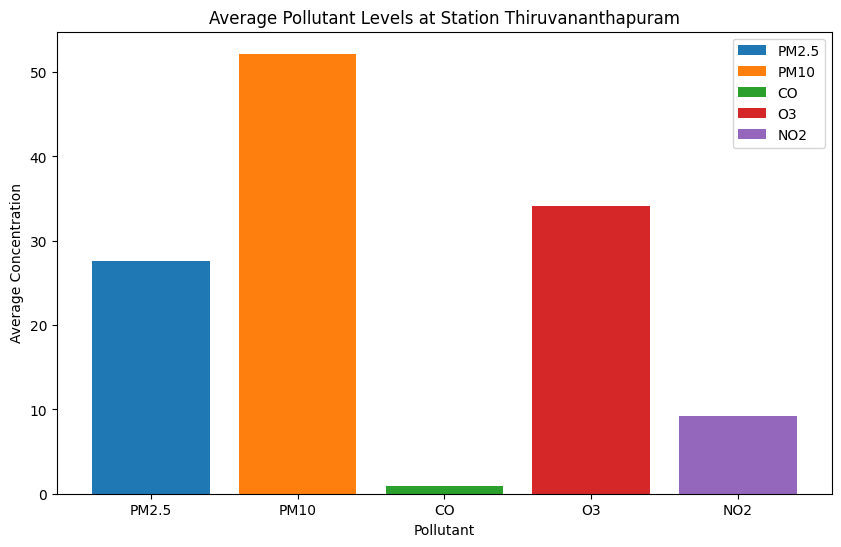

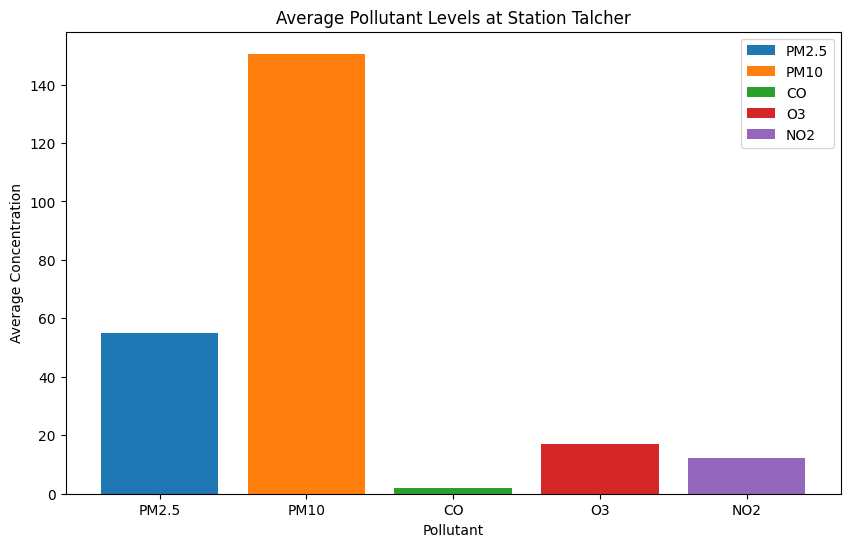

In [104]:
import matplotlib.pyplot as plt

Cities = df['City'].unique()
pollutants = ['PM2.5', 'PM10', 'CO', 'O3', 'NO2']

for City in Cities:
    City_data = df[df['City'] == City]
    plt.figure(figsize=(10, 6))
    for pollutant in pollutants:
        plt.bar(pollutant, City_data[pollutant].mean(), label=pollutant)
    plt.title(f'Average Pollutant Levels at Station {City}')
    plt.xlabel('Pollutant')
    plt.ylabel('Average Concentration')
    plt.legend()
    plt.show()

In [105]:
def max_polluted_stations(selected_pollutants):
    x1 = df[[selected_pollutants,'City']].groupby(["City"]).mean().sort_values(by=selected_pollutants,ascending=False).reset_index()
    x1[selected_pollutants] = round(x1[selected_pollutants],2)
    return x1[:6].style.background_gradient(cmap='OrRd')

In [106]:
from IPython.display import display_html

def display_side_by_side(*args):
    # Convert each DataFrame's Styler object to HTML and join them together
    html_str = ''
    for df in args:
        html_str += df._repr_html_()  # Use _repr_html_ to get the HTML representation
    display_html(html_str.replace('table', 'table style="display:inline;margin-right:20px;"'), raw=True)

pm2_5 = max_polluted_stations('PM2.5')
pm10 = max_polluted_stations('PM10')
co = max_polluted_stations('CO')
o3 = max_polluted_stations('O3')
no2 = max_polluted_stations('NO2')
nox =max_polluted_stations('NOx')

# Display the DataFrames side by side
display_side_by_side(pm2_5, pm10, co, o3, no2, nox)

,City,PM2.5
0,Gurugram,117.580000
1,Delhi,117.100000
2,Patna,114.510000
3,Lucknow,104.790000
4,Ahmedabad,92.190000
5,Guwahati,63.860000
,City,PM10
0,Delhi,233.950000
1,Talcher,150.560000
2,Jorapokhar,149.140000


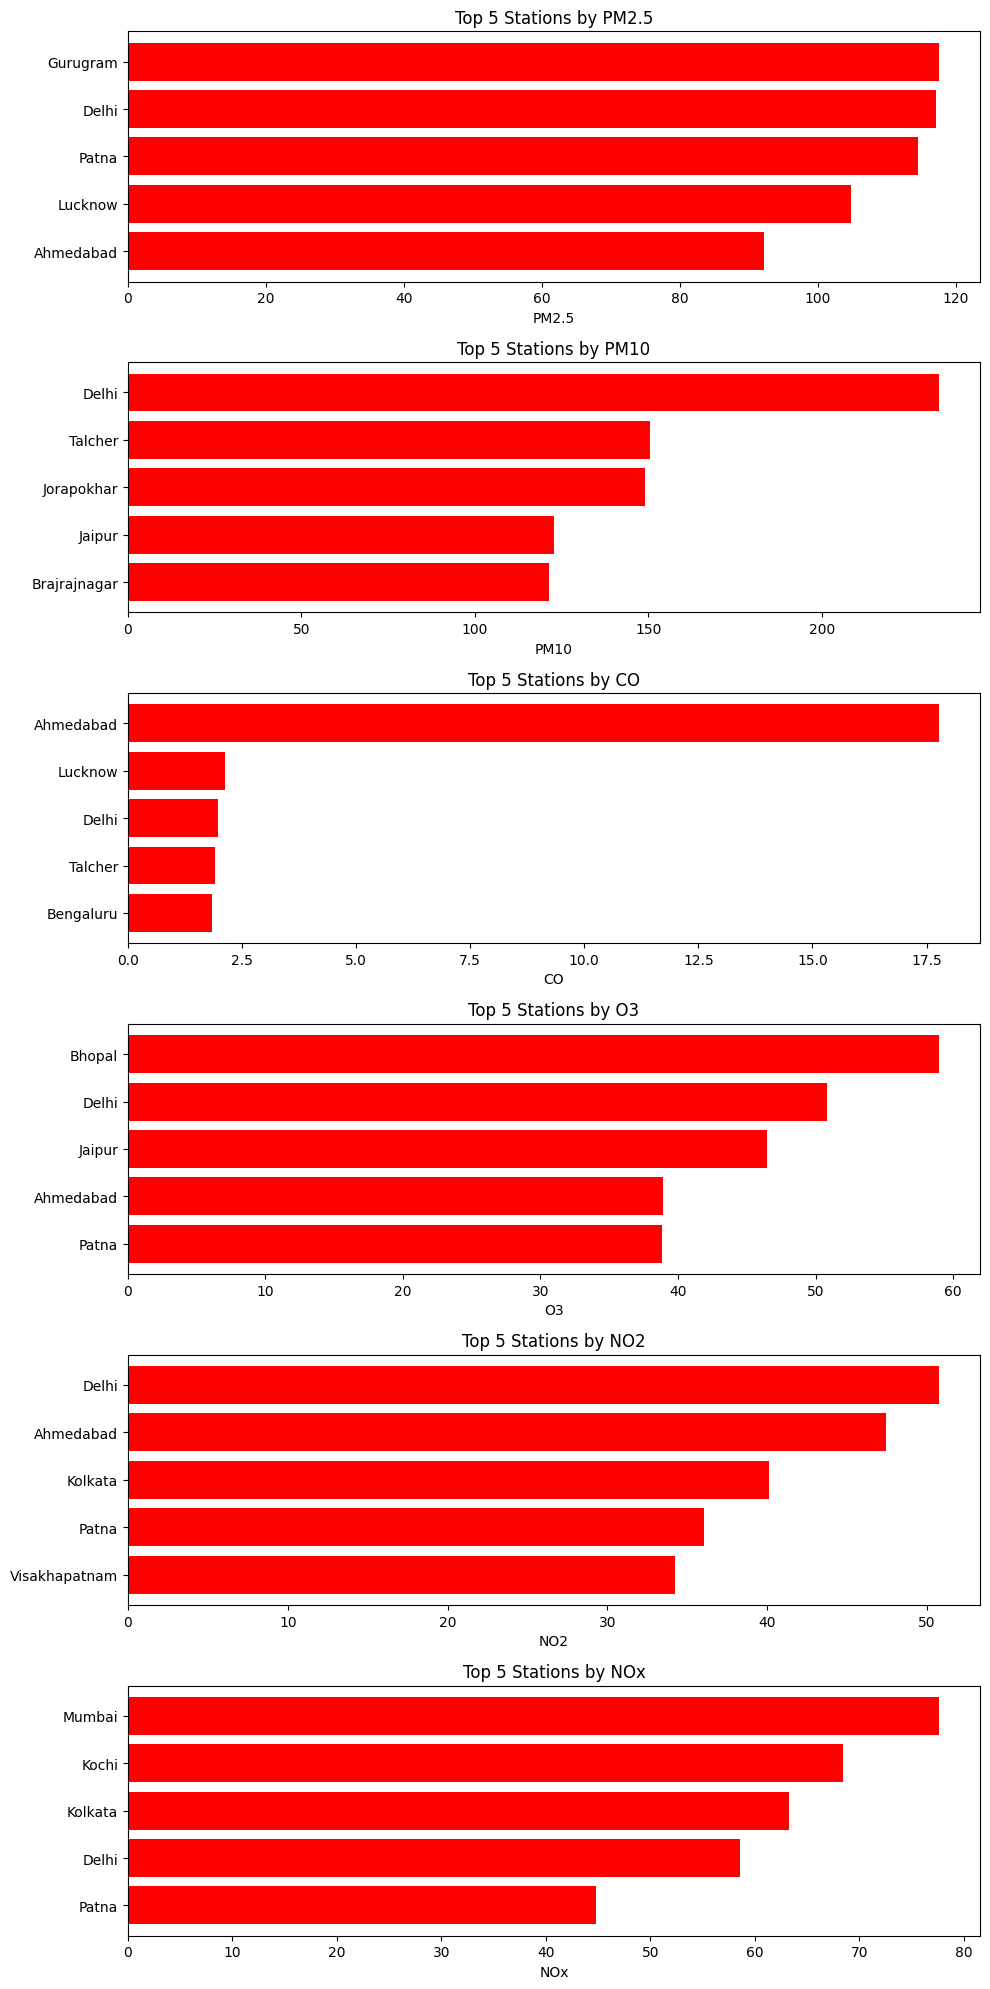

In [107]:
pollutant_columns = ['PM2.5','PM10','CO','O3', 'NO2','NOx']

# Step 1: Group by station and calculate mean pollutant concentrations
mean_pollutant_by_city = df.groupby('City')[pollutant_columns].mean()

# Step 2: Find the top 5 stations for each pollutant
top_stations = {}
for pollutant in pollutant_columns:
    top_stations[pollutant] = mean_pollutant_by_city[pollutant].sort_values(ascending=False).head(5)

# Step 3: Plotting
fig, axes = plt.subplots(len(pollutant_columns), 1, figsize=(10, 20))

for i, pollutant in enumerate(pollutant_columns):
    axes[i].barh(top_stations[pollutant].index, top_stations[pollutant].values, color='red')
    axes[i].set_title(f'Top 5 Stations by {pollutant}')
    axes[i].set_xlabel(f'{pollutant}')
    axes[i].invert_yaxis()  # Highest values on top

plt.tight_layout()
plt.show()


In [108]:
# Create a bar chart for the Average of each pollutant
import plotly.express as px

# Calculate the A verage of each pollutant
pollutants = ['PM2.5','PM10','CO','O3', 'NO2','NOx']
mean_pollutants = df[pollutants].mean()

# Create the bar chart
fig = px.bar(
    x=pollutants,
    y=mean_pollutants,
    title='Average of Each Pollutant',
    labels={'x': 'Pollutant', 'y': 'Average Concentration'}
)

fig.show()

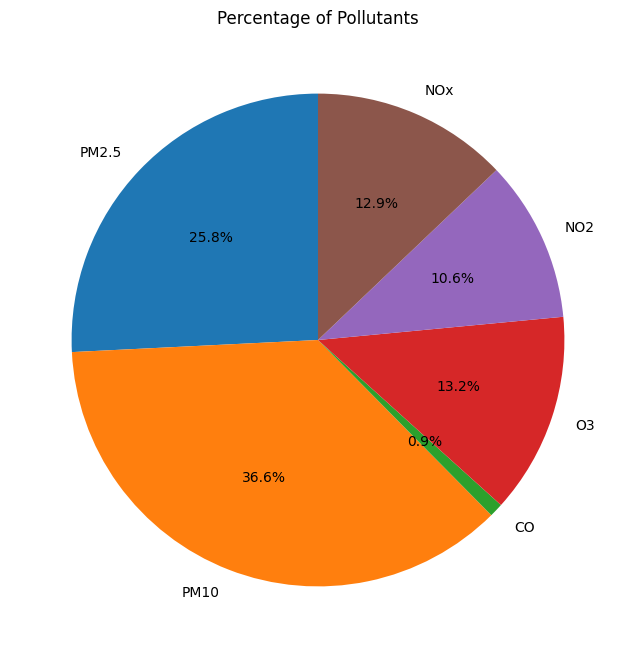

In [109]:
import matplotlib.pyplot as plt

  # Assuming 'all_data' is your DataFrame
pollutants = ['PM2.5','PM10','CO','O3', 'NO2','NOx']
total_pollutant_concentration = df[pollutants].sum().sum()  # Calculates total concentration across all pollutants

  # Calculate percentage for each pollutant
pollutant_percentages = [(df[pollutant].sum() / total_pollutant_concentration) * 100 for pollutant in pollutants]

  # Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(pollutant_percentages, labels=pollutants, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Pollutants')
plt.show()

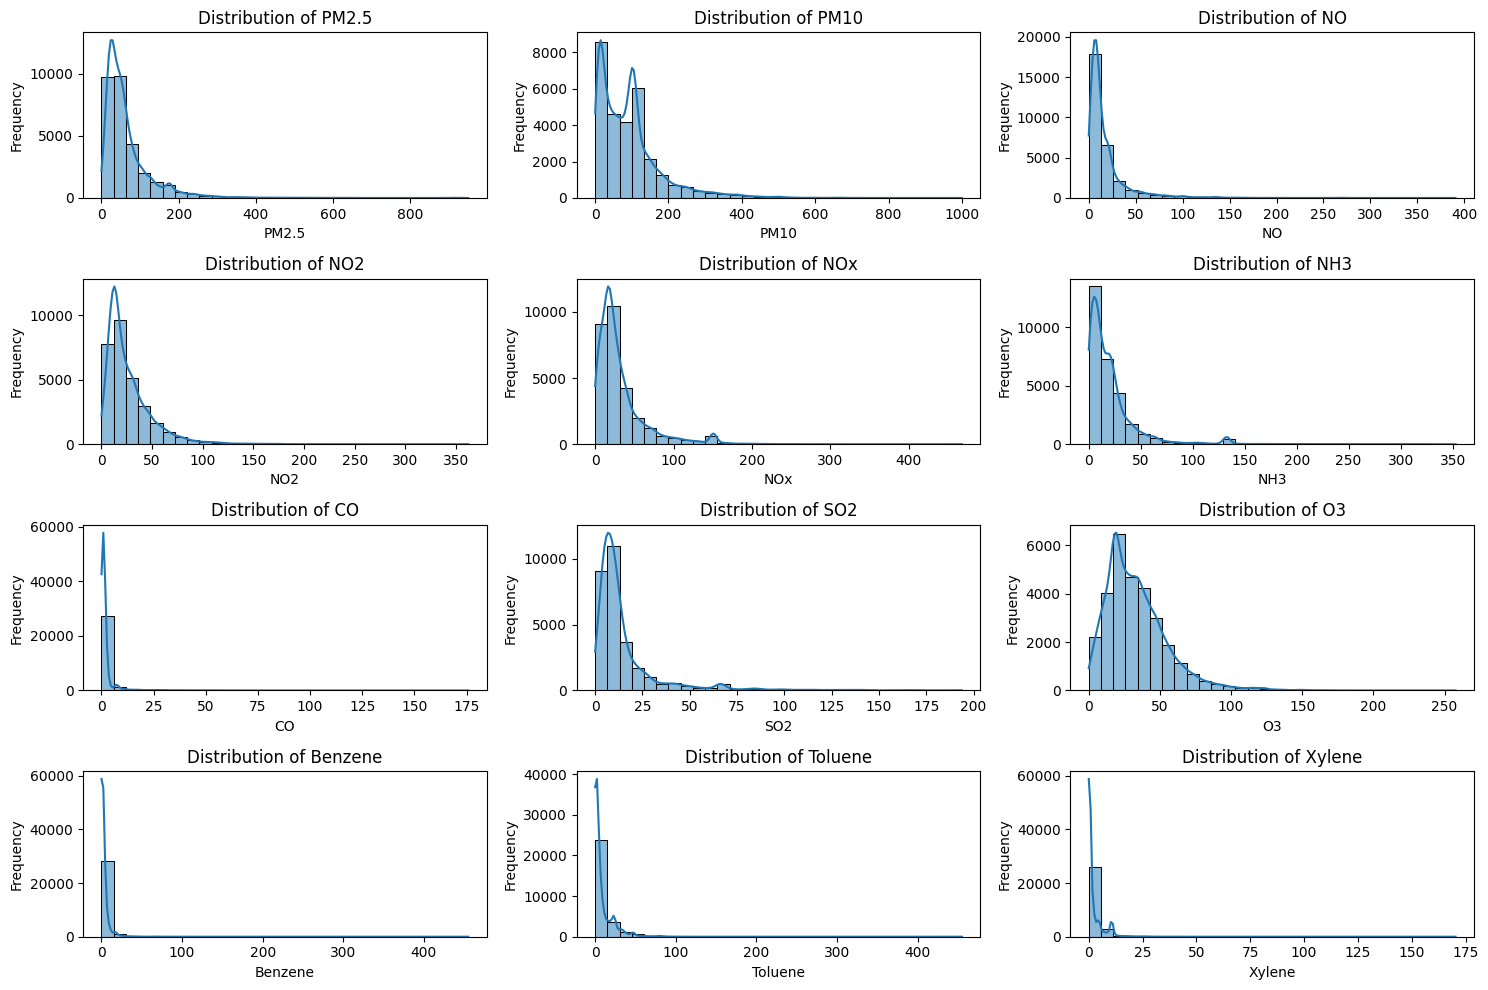

In [110]:
# Visualizing the distribution of key variables using histograms
key_variables = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

plt.figure(figsize=(15, 10))
for i, column in enumerate(key_variables, 1): # the subplot starts from index 1 and not from 0
  '''
  # enumerate() is a built-in Python function that lets you loop through a
  list and automatically keep track of the index (position) of each item at the same time.
  '''
  plt.subplot(4, 3, i)
  sns.histplot(df[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

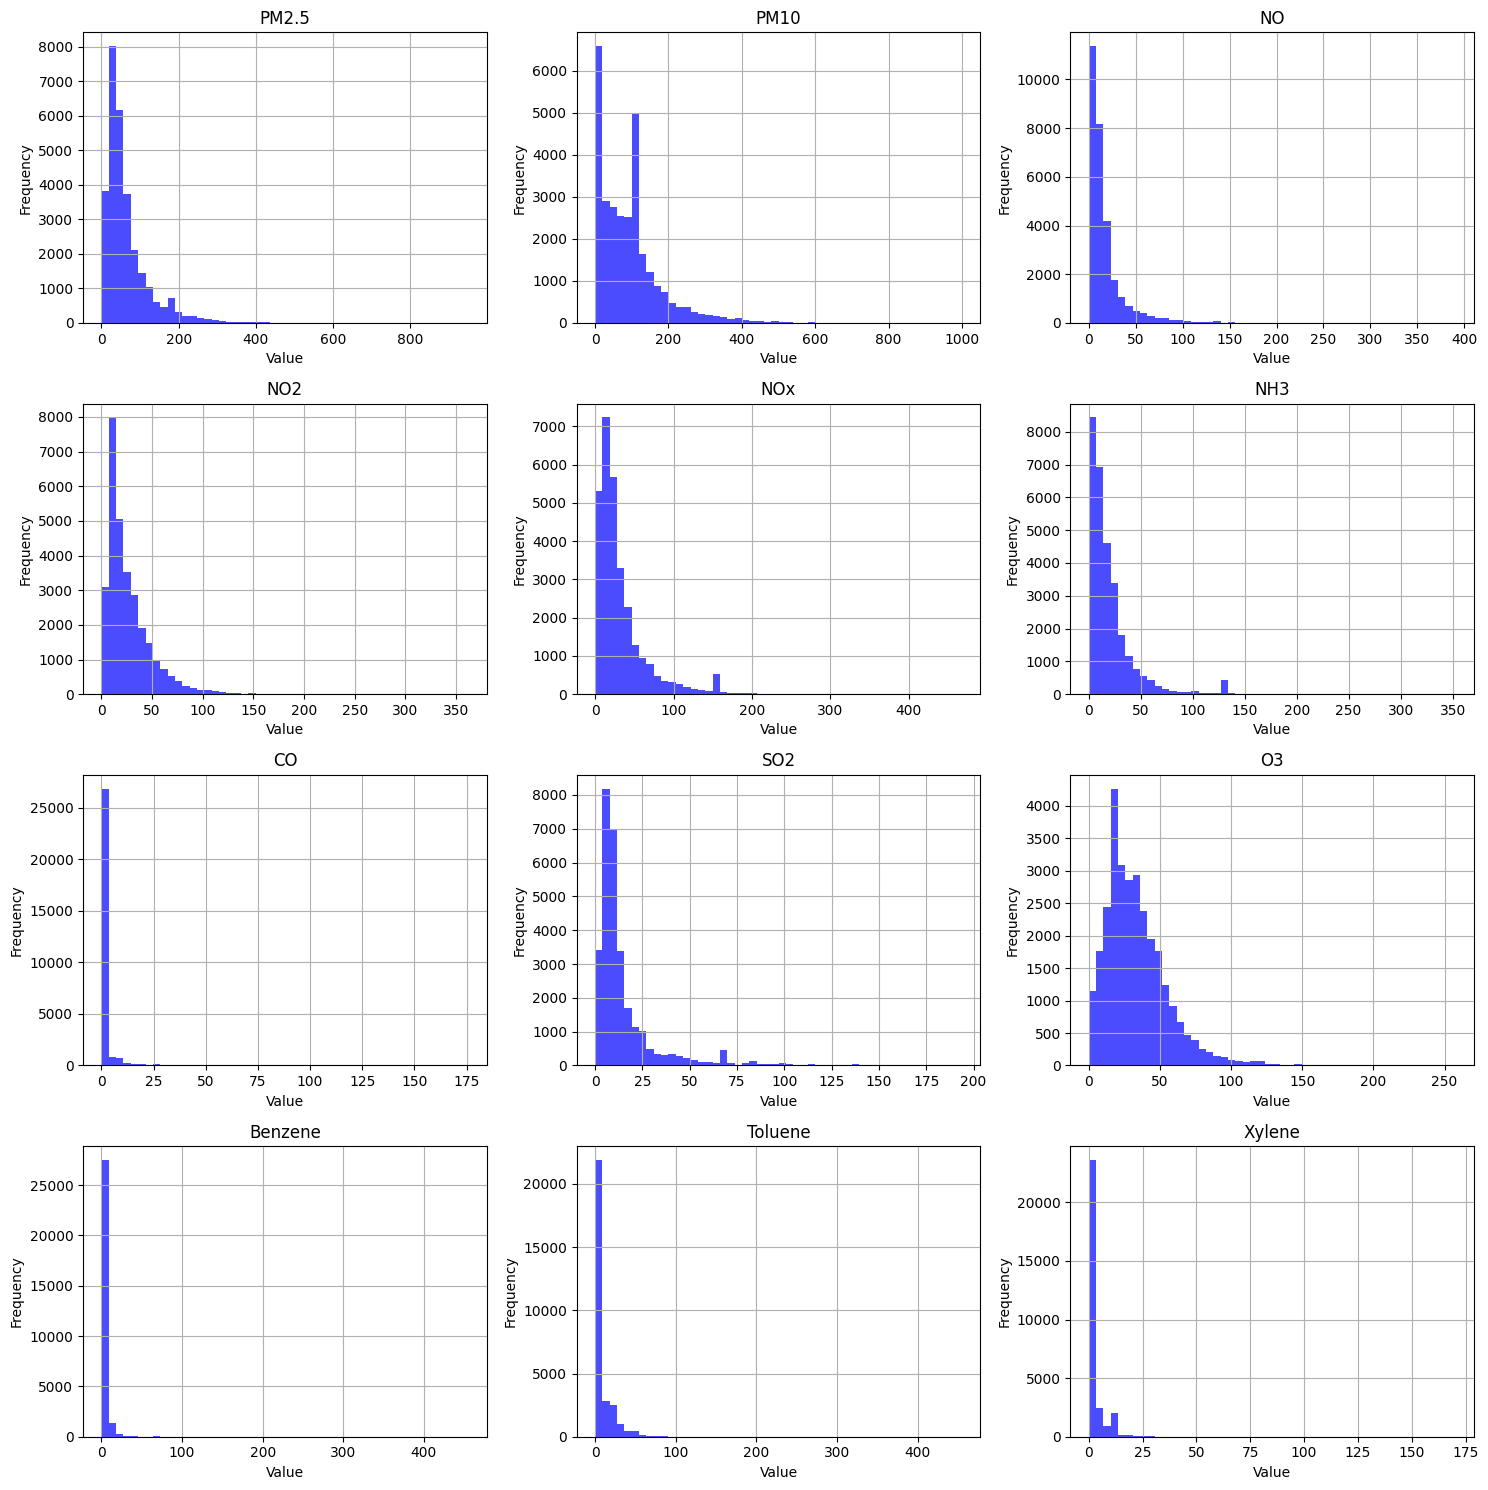

In [111]:
import matplotlib.pyplot as plt

# Select numerical columns for visualization
numerical_columns = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    df[column].hist(bins=50, ax=ax, color='blue', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove empty subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

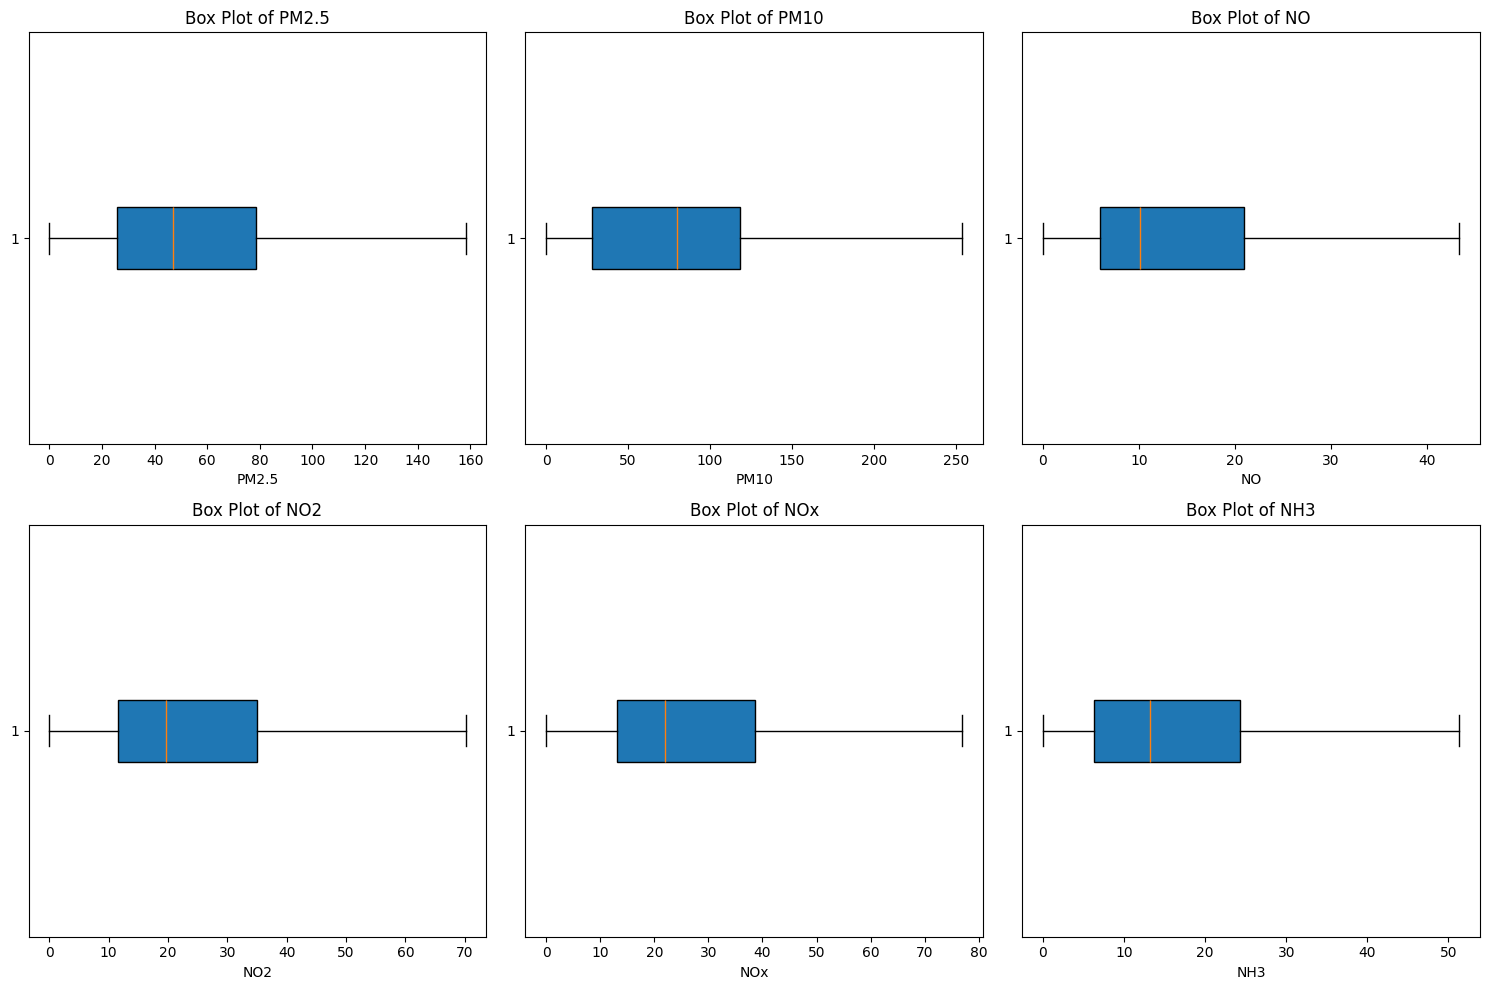

In [112]:
# Define the pollutants to analyze
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3']

# Create a figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a box plot for each pollutant in a subplot
for i, pollutant in enumerate(pollutants):
    axes[i].boxplot(df[pollutant], vert=False, patch_artist=True, showfliers=False)
    axes[i].set_title(f'Box Plot of {pollutant}')
    axes[i].set_xlabel(pollutant)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

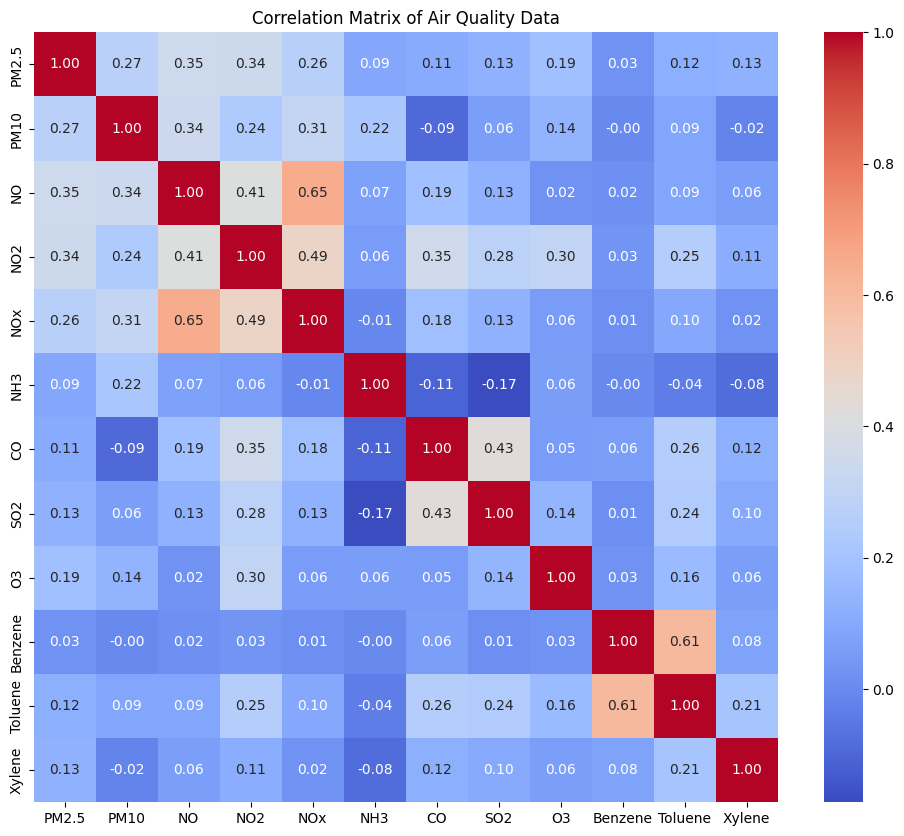

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
pollutants =df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']]

# Calculate the correlation matrix
correlation_matrix = pollutants.corr()

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Data')
plt.show()

In [114]:
pollutants.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
PM2.5,1.000000,0.274570,0.347000,0.340896,0.263715,0.089587,0.105786,0.125881,0.185768,0.026783,0.118545,0.130148
PM10,0.274570,1.000000,0.339114,0.236180,0.308653,0.218233,-0.091903,0.064778,0.138774,-0.001107,0.085453,-0.018522
NO,0.347000,0.339114,1.000000,0.411239,0.649859,0.071768,0.188360,0.128076,0.024360,0.017517,0.085713,0.062865
NO2,0.340896,0.236180,0.411239,1.000000,0.486766,0.056016,0.353460,0.280427,0.302106,0.031289,0.254779,0.113328
NOx,0.263715,0.308653,0.649859,0.486766,1.000000,-0.011314,0.183903,0.125821,0.055435,0.013887,0.097157,0.022865
NH3,0.089587,0.218233,0.071768,0.056016,-0.011314,1.000000,-0.107930,-0.172404,0.057263,-0.002044,-0.037855,-0.083070
CO,0.105786,-0.091903,0.188360,0.353460,0.183903,-0.107930,1.000000,0.429426,0.053517,0.062788,0.257250,0.123324
SO2,0.125881,0.064778,0.128076,0.280427,0.125821,-0.172404,0.429426,1.000000,0.141400,0.011897,0.240660,0.100742
O3,0.185768,0.138774,0.024360,0.302106,0.055435,0.057263,0.053517,0.141400,1.000000,0.027620,0.164457,0.063425
Benzene,0.026783,-0.001107,0.017517,0.031289,0.013887,-0.002044,0.062788,0.011897,0.027620,1.000000,0.605436,0.079045


In [115]:
import numpy as np
# Select relevant columns for correlation analysis
corr_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
corr_matrix = df[corr_cols].corr()

# Create text annotations for percentages
text_annotations = np.around(corr_matrix.values, decimals=2)
text_annotations = text_annotations.astype(str)

# Creating heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix.values,
                   x=corr_cols,
                   y=corr_cols,
                   colorscale='Viridis',
                   hoverongaps = False,
                   text=text_annotations,  # Add text annotations
                   texttemplate="%{text}"  # Format text as percentages
                   ))

fig.update_layout(title='Correlation Matrix of Weather Conditions and Pollutants')
fig.show()

In [120]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        11590 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
dtypes: datetime64[ns](1), 

In [121]:
df['month'] = df['Date'].dt.month

In [122]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
df['Season'] = df['month'].apply(get_season)

In [125]:
# Group by season and calculate average pollutant concentrations
seasonal_avg = df.groupby('Season')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

# Melt the DataFrame for visualization
seasonal_avg_melted = pd.melt(seasonal_avg, id_vars=['Season'], var_name='Pollutant', value_name='Average Concentration')

# Create a bar chart to visualize seasonal trends
fig = px.bar(seasonal_avg_melted,
             x='Season',
             y='Average Concentration',
             color='Pollutant',
             title='Average Pollutant Concentrations by Season',
             barmode='group')  # Use 'group' for grouped bars

fig.show()